# Open CV基礎

In [1]:
import cv2
import sys
sys.executable

'/Users/msaka/Desktop/code_test/bioimage_project/.venv/bin/python'

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
BASE_DIR = Path.cwd().parent
path = BASE_DIR / "data" / "sample.jpg"

In [6]:
image = cv2.imread(path)
if image is None:
    print("画像が読み込めませんでした")
else:
    print(f"画像サイズ: {image.shape}")

画像サイズ: (3000, 4000, 3)


In [7]:
print(image[0,0])

[ 70 107 167]


In [8]:
import numpy as np
gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [9]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

sharpness = np.var(laplacian)
print(f"シャープネス： {sharpness}")

シャープネス： 75.53395739332223


Laplacianフィルタの出力は、エッジの強さを表す数値の配列です。

- ピントが合った画像: エッジがたくさんある → Laplacian値のバラつきが大きい → 分散が大きい
- ピンぼけ画像: エッジが少ない → Laplacian値が全体的に小さい → 分散が小さい

In [11]:
blurred = cv2.GaussianBlur(image, (5,5), 0)
blurred_shigma3 = cv2.GaussianBlur(image, (0,0), sigmaX=3)


cv2.GaussianBlur(入力画像, カーネルサイズ, sigmax)

**カーネルサイズ:**
- (5, 5) のように奇数×奇数で指定
- 数字が大きいほどぼかしの範囲が広がる
- (0, 0) にすると、sigmaXから自動計算される

**sigmaX（σ）:**
- ぼかしの強さを決める値
- 大きいほど強くぼける
- 0 にすると、カーネルサイズから自動計算される


/var/folders/j5/7dp0pr0j4gvbdn5rmh_k2z2w0000gn/T/ipykernel_72051/2200449883.py:16: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/7dp0pr0j4gvbdn5rmh_k2z2w0000gn/T/ipykernel_72051/2200449883.py:16: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j5/7dp0pr0j4gvbdn5rmh_k2z2w0000gn/T/ipykernel_72051/2200449883.py:16: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/msaka/Desktop/code_test/bioimage_project/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/msaka/Desktop/code_test/bioimage_project/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRA

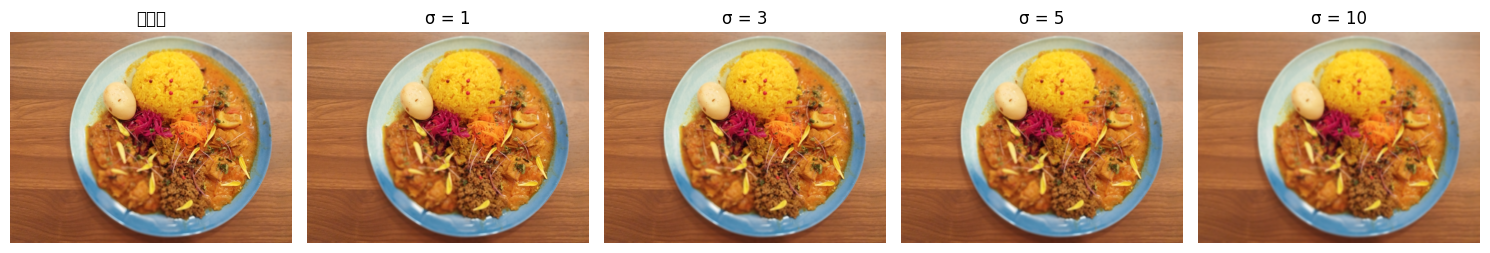

In [12]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sigma_values = [1,3,5,10]
fig, axes = plt.subplots(1,5,figsize=(15,3))
axes[0].imshow(image_rgb)
axes[0].set_title("元画像")
axes[0].axis('off')

# 各σでぼかした画像
for i, sigma in enumerate(sigma_values):
    blurred = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma)
    blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
    axes[i+1].imshow(blurred_rgb)
    axes[i+1].set_title(f"σ = {sigma}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
def calc_sharpness(image):
    """シャープネスを計算"""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return np.var(laplacian)
# 元画像のシャープネス
print(f"元画像: {calc_sharpness(image):.2f}")

# ぼかした画像のシャープネス
for sigma in [1, 3, 5]:
    blurred = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma)
    print(f"σ={sigma}: {calc_sharpness(blurred):.2f}")


元画像: 74.92
σ=1: 3.84
σ=3: 1.61
σ=5: 1.42


In [ ]:
color = cv2.imread(path)  # shape: (3000, 4000, 3)

# グレースケールに変換
gray_image = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(3000, 4000)
